<h1  align="center"> Análise da Violência no Estado do Rio de Janeiro </h1>

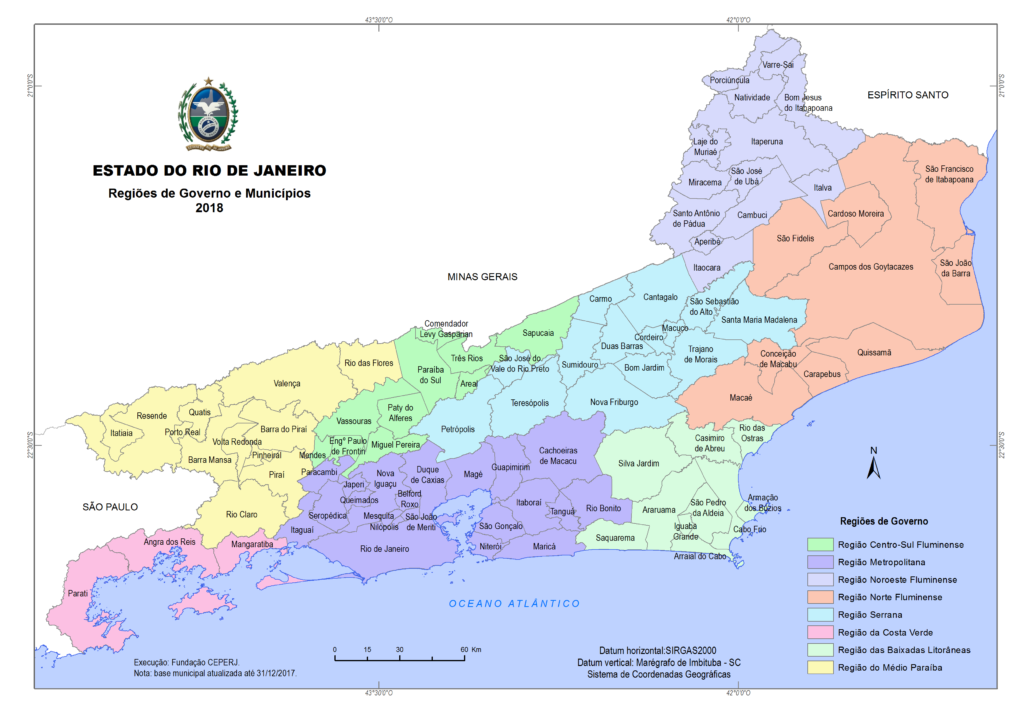

**<h2>O PROJETO</h2>**
***
💻Tematica: 

O Rio de janeiro é um estado conhecido pelo grande numero de crimes diariamente.

Assim, este notebook consiste em analisar os crimes nas cidades do Rio de Janeiro e com isso, identificar quais são as cidades mais perigosas em relação aos crimes e as mais seguras.

</br>
<h4>🎲Dados:</h4>

***

Para realizar a analise foi utulizado o seguintes datasets:

* Estatísticas de segurança: série histórica mensal por município desde 01/2014 até nov/2020 (taxas por 100 mil habitantes)
* fonte: http://www.ispdados.rj.gov.br/estatistica.html
* Índice de organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2017/UFs/RJ
* fonte: ftp://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2017/UFs/)
</br>

📊 Como o notebook está organizado:
***

Ao longo do notebook há análises do Rio Janeiro e análises específicas de algumas cidades e regiões.

</br>

<h4>📝Conteúdo:</h4>

***

**1. Importação das bibliotecas**

**2. Importação dos datasets**

**3. Analise Macro**

**4. Análises dos dados**

  * 4.1. Regiões em Geral
  * 4.2. Região Serrana
  * 4.3. Cidade de Petrópolis

    * 4.3.1. Número de roubos e Furtos
    * 4.3.2. Drogas
    * 4.3.3. Crimes em geral

**5. Machine Learning: Cluster (K-Means)**

**6. Visualização utilizando GeoPandas**

# Importação das Bibliotecas

***


In [ ]:
# Importações

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

from sklearn.cluster import KMeans

import plotly.graph_objects as go
import numpy as np
from sklearn.metrics import silhouette_score

import geopandas as gpd
import pandas as pd
import os

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#!pip install biokit

# Importação da Base de Dados

***

Estatísticas de segurança: série histórica mensal por município desde 01/2014 (taxas por 100 mil habitantes)

Dados retirados do site: http://www.ispdados.rj.gov.br/estatistica.html

In [ ]:
dados = pd.read_csv('/content/BaseMunicipioMensal.csv', sep= ';', encoding = "ISO-8859-1")

In [ ]:
dados.head()

,fmun_cod,fmun,ano,mes,mes_ano,regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,cvli,roubo_rua,registro_ocorrencias,fase
0,3300100,Angra dos Reis,2014,1,2014m01,Interior,11,0,0,1,12,2,96,7,4,37,4,0,8,0,5,1,0,0,1,0,0,0,5,23,18,3,3,11,0,98,134,0,0,0,21,35,18,12,5,9,28,6,8,0,98,13,3,0,0,0,11,7,561,3
1,3300159,Aperibé,2014,1,2014m01,Interior,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,3300209,Araruama,2014,1,2014m01,Interior,2,0,0,0,2,6,69,7,1,45,3,2,9,0,6,0,0,0,1,0,0,0,2,23,16,2,1,10,0,76,105,0,2,0,18,13,9,4,1,4,34,5,5,0,91,10,1,0,0,0,2,7,480,3
3,3300225,Areal,2014,1,2014m01,Interior,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,3300233,Armação dos Búzios,2014,1,2014m01,Interior,2,0,0,0,2,0,44,6,0,26,0,0,2,0,5,0,0,0,1,0,0,0,20,12,9,9,2,7,0,74,117,0,0,0,4,16,6,10,2,2,26,8,3,2,46,0,0,0,0,0,2,6,309,3


# Exploração da base de dados

***

📎 Esta seção consiste em analisar de forma macro os datasets, conhecer as informações contidas nos dados e se familiarizar com as terminologias e variáveis.

In [ ]:
# Tamanho do dataset
dados.shape

print('O dataset possui {} linhas e {} colunas'.format(dados.shape[0], dados.shape[1]))

O dataset possui 7636 linhas e 60 colunas


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7636 entries, 0 to 7635
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fmun_cod                    7636 non-null   int64 
 1   fmun                        7636 non-null   object
 2   ano                         7636 non-null   int64 
 3   mes                         7636 non-null   int64 
 4   mes_ano                     7636 non-null   object
 5   regiao                      7636 non-null   object
 6   hom_doloso                  7636 non-null   int64 
 7   lesao_corp_morte            7636 non-null   int64 
 8   latrocinio                  7636 non-null   int64 
 9   hom_por_interv_policial     7636 non-null   int64 
 10  letalidade_violenta         7636 non-null   int64 
 11  tentat_hom                  7636 non-null   int64 
 12  lesao_corp_dolosa           7636 non-null   int64 
 13  estupro                     7636 non-null   int6

In [ ]:
# Municipios 
dados['fmun'].unique()

array(['Angra dos Reis', 'Aperibé', 'Araruama', 'Areal',
       'Armação dos Búzios', 'Arraial do Cabo', 'Barra do Piraí',
       'Barra Mansa', 'Belford Roxo', 'Bom Jardim',
       'Bom Jesus do Itabapoana', 'Cabo Frio', 'Cachoeiras de Macacu',
       'Cambuci', 'Carapebus', 'Comendador Levy Gasparian',
       'Campos dos Goytacazes', 'Cantagalo', 'Cardoso Moreira', 'Carmo',
       'Casimiro de Abreu', 'Conceição de Macabu', 'Cordeiro',
       'Duas Barras', 'Duque de Caxias', 'Engenheiro Paulo de Frontin',
       'Guapimirim', 'Iguaba Grande', 'Itaboraí', 'Itaguaí', 'Italva',
       'Itaocara', 'Itaperuna', 'Itatiaia', 'Japeri', 'Laje do Muriaé',
       'Macaé', 'Macuco', 'Magé', 'Mangaratiba', 'Maricá', 'Mendes',
       'Mesquita', 'Miguel Pereira', 'Miracema', 'Natividade',
       'Nilópolis', 'Niterói', 'Nova Friburgo', 'Nova Iguaçu',
       'Paracambi', 'Paraíba do Sul', 'Paraty', 'Paty do Alferes',
       'Petrópolis', 'Pinheiral', 'Piraí', 'Porciúncula', 'Porto Real',
       'Q

<h4>Separando os dados em regiões de acordo com as Regiões de Gorveno e Municipios 2018</h4>

In [ ]:
regiao_costa_verde = dados.query('fmun == "Paraty" or fmun == "Angra dos Reis" or fmun == "Mangaratiba"')
regiao_medio_paraiba = dados.query('fmun == "Rio Claro" or fmun == "Barra Mansa" or fmun == "Resende" or fmun == "Itatiaia" or fmun == "Porto Real" or fmun == "Quatis" or fmun == "Volta Redonda" or fmun == "Pinheral" or fmun == "Piraí" or fmun == "Barra do Piraí" or fmun == "Valença" or fmun == "Rio das Flores"')
regiao_centro_sul_fluminense = dados.query('fmun == "Mendes" or fmun == "Engenheiro Paulo de Frontin" or fmun == "Vassouras" or fmun == "Paty do Alferes" or fmun == "Paraíba do Sul" or fmun == "Comendador Levy Gasparian" or fmun == "Três Rios" or fmun == "Areal" or fmun == "Sapucaia" or fmun == "Miguel Pereira"')
regiao_metropolitana = dados.query('fmun == "Itaguaí" or fmun == "Seropédica" or fmun == "Rio de Janeiro" or fmun == "Paracambi" or fmun == "Japeri" or fmun == "Queimados" or fmun == "Mesquita" or fmun == "Nilópolis" or fmun == "Nova Iguaçu" or fmun == "Belford Roxo" or fmun == "São João de Meriti" or fmun == "Duque de Caxias" or fmun == "Magé" or fmun == "Guapimirim" or fmun == "São Gonçalo" or fmun == "Niterói" or fmun == "Cachoeiras de Macacu" or fmun == "Itaboraí" or fmun == "Maricá" or fmun == "Tanguá" or fmun == "Rio Bonito"')
regiao_serrana = dados.query('fmun == "Petrópolis" or fmun == "Teresópolis" or fmun == "São José do Vale do Rio Preto" or fmun == "Sumidouro" or fmun == "Nova Friburgo" or fmun == "Carmo" or fmun == "Duas Barras" or fmun == "Bom Jardim" or fmun == "Cantagalo" or fmun == "Cordeiro" or fmun == "Trajano de Moraes" or fmun == "Macuco" or fmun == "São Sebastião do Alto" or fmun == "Santa Maria Madalena"')
regiao_baixada_litoraneas = dados.query('fmun == "Silva Jardim" or fmun == "Araruama" or fmun == "Saquarema" or fmun == "Casimiro de Abreu" or fmun == "São Pedro da Aldeia" or fmun == "Iguaba Grande" or fmun == "Arraial do Cabo" or fmun == "Cabo Frio" or fmun == "Armação dos Búzios" or fmun == "Rio das Ostras"')
regiao_norte_fluminense = dados.query('fmun == "Macaé" or fmun == "Conceição de Macabu" or fmun == "Carapebus" or fmun == "Quissamã" or fmun == "Campos dos Goytacazes" or fmun == "São João da Barra" or fmun == "São Fidélis" or fmun == "Cardoso Moreira" or fmun == "São Francisco de Itabapoana"')
regiao_noroeste_fluminense = dados.query('fmun == "Itaocara" or fmun == "Aperibé" or fmun == "Santo Antônio de Pádua" or fmun == "Cambuci" or fmun == "Italva" or fmun == "São José de Ubá" or fmun == "Miracema" or fmun == "Laje do Muriaé" or fmun == "Itaperuna" or fmun == "Natividade" or fmun == "Bom Jesus do Itabapoana" or fmun == "Porciúncula" or fmun == "Varre-Sai"')

# Análise de dados 
***


## Regiões em Geral
***



📎 Esta seção consiste em analisar as regiões em geral para conseguir observar a diferença entre elas.


In [ ]:
# Numero de roubos por cidade.

df_dados_fmun = pd.DataFrame(dados.groupby('fmun', as_index=False)['total_roubos'].sum()).sort_values('total_roubos', ascending=False)
df_dados_fmun.reset_index(drop = True, inplace = True)
df_dados_fmun = df_dados_fmun.rename(columns = ({'fmun': 'Município'}))
df_dados_fmun.columns.name = 'id'
df_dados_fmun.head(5)

id,Município,total_roubos
0,Rio de Janeiro,672116
1,São Gonçalo,123604
2,Duque de Caxias,100418
3,Nova Iguaçu,78084
4,São João de Meriti,58677


In [ ]:
# Numero de roubos e estupros por região de governo.

df_regioes = pd.DataFrame()
df_regioes['Regioes'] = ['Costa Verde', 'Medio Paraiba', 'Centro Sul Fluminense', 'Metropolitana', 'Serrana', 'Baixada Litoranea', 'Norte Fluminense', 'Noroeste Fluminense']
df_regioes['Total_Roubos'] = [regiao_costa_verde['total_roubos'].sum(), regiao_medio_paraiba['total_roubos'].sum(), regiao_centro_sul_fluminense['total_roubos'].sum(), regiao_metropolitana['total_roubos'].sum(), regiao_serrana['total_roubos'].sum(), regiao_baixada_litoraneas['total_roubos'].sum(), regiao_norte_fluminense['total_roubos'].sum(), regiao_noroeste_fluminense['total_roubos'].sum()]
df_regioes['Total_Furtos'] = [regiao_costa_verde['total_furtos'].sum(), regiao_medio_paraiba['total_furtos'].sum(), regiao_centro_sul_fluminense['total_furtos'].sum(), regiao_metropolitana['total_furtos'].sum(), regiao_serrana['total_furtos'].sum(), regiao_baixada_litoraneas['total_furtos'].sum(), regiao_norte_fluminense['total_furtos'].sum(), regiao_noroeste_fluminense['total_furtos'].sum()]
df_regioes['Total_Roubos_e_Furtos'] = df_regioes['Total_Roubos'] + df_regioes['Total_Furtos']
df_regioes['Estupros'] = [regiao_costa_verde['estupro'].sum(), regiao_medio_paraiba['estupro'].sum(), regiao_centro_sul_fluminense['estupro'].sum(), regiao_metropolitana['estupro'].sum(), regiao_serrana['estupro'].sum(), regiao_baixada_litoraneas['estupro'].sum(), regiao_norte_fluminense['estupro'].sum(), regiao_noroeste_fluminense['estupro'].sum()]

df_regioes = df_regioes.sort_values('Total_Roubos_e_Furtos', ascending = False)
df_regioes.reset_index(drop = True, inplace = True)
df_regioes

,Regioes,Total_Roubos,Total_Furtos,Total_Roubos_e_Furtos,Estupros
0,Metropolitana,1221870,879797,2101667,24627
1,Baixada Litoranea,22877,52572,75449,2441
2,Norte Fluminense,24497,41880,66377,2087
3,Medio Paraiba,8328,34070,42398,1667
4,Serrana,4629,33151,37780,2093
5,Costa Verde,5113,11643,16756,761
6,Noroeste Fluminense,981,12118,13099,728
7,Centro Sul Fluminense,1269,10690,11959,821


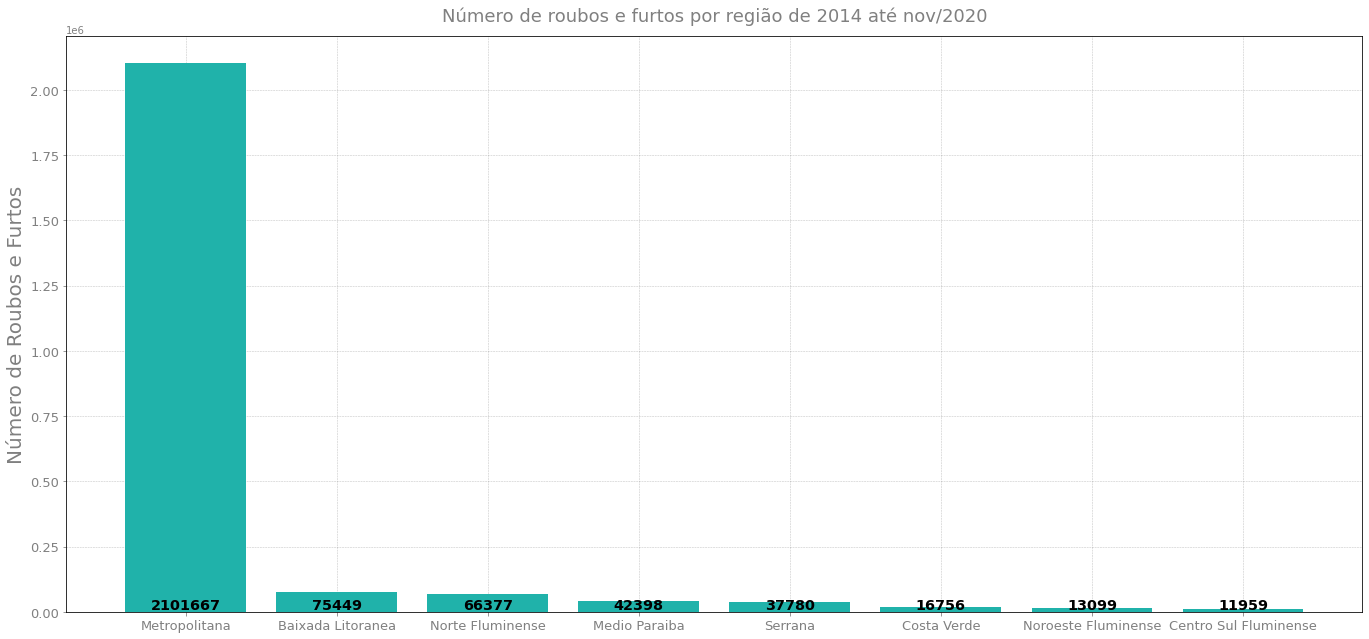

In [ ]:
# Visualização grafica dos roubos por região de governo

fig = plt.figure(figsize=(18,8))
eixo = fig.add_axes([0,0,1,1])

eixo.grid(True, zorder = 0, linestyle = '--', linewidth = 0.5)
eixo.set_title('Número de roubos e furtos por região de 2014 até nov/2020', fontsize = 18, color = 'grey', pad = 15)
eixo.set_ylabel('Número de Roubos e Furtos', fontsize = 20, color = 'grey')
eixo.set_xlabel('', fontsize = 0)
eixo.tick_params(labelsize=13, colors='grey', grid_color='grey', grid_alpha=0.5)

# Eixo bar
eixo.bar(df_regioes['Regioes'], df_regioes['Total_Roubos_e_Furtos'].sort_values(ascending = False), color = 'lightseagreen', zorder = 2)

#Labels inside bar
for rect in eixo.patches:
    height = rect.get_height()
    ypos = (rect.get_y() * height) + 50
    eixo.text(rect.get_x() + rect.get_width()/2, ypos,
            '%d' % int(height), ha='center', va='bottom', c="black", fontsize = 'x-large', weight = 'bold')
    

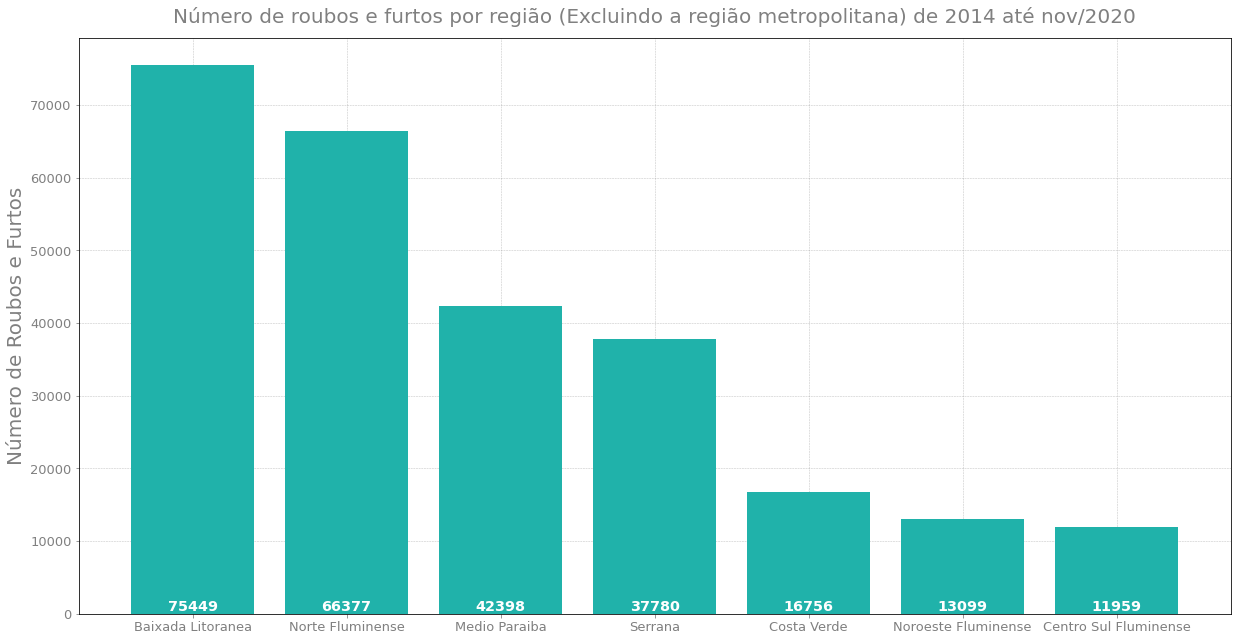

In [ ]:
# Retirando a região Metropolitana para melhorar a analise.

df_regioes_sem_metropolitana = pd.DataFrame()
df_regioes_sem_metropolitana['Regioes'] = ['Costa Verde', 'Medio Paraiba', 'Centro Sul Fluminense', 'Serrana', 'Baixada Litoranea', 'Norte Fluminense', 'Noroeste Fluminense']
df_regioes_sem_metropolitana['Total_Roubos'] = [regiao_costa_verde['total_roubos'].sum(), regiao_medio_paraiba['total_roubos'].sum(), regiao_centro_sul_fluminense['total_roubos'].sum(), regiao_serrana['total_roubos'].sum(), regiao_baixada_litoraneas['total_roubos'].sum(), regiao_norte_fluminense['total_roubos'].sum(), regiao_noroeste_fluminense['total_roubos'].sum()]
df_regioes_sem_metropolitana['Total_Furtos'] = [regiao_costa_verde['total_furtos'].sum(), regiao_medio_paraiba['total_furtos'].sum(), regiao_centro_sul_fluminense['total_furtos'].sum(), regiao_serrana['total_furtos'].sum(), regiao_baixada_litoraneas['total_furtos'].sum(), regiao_norte_fluminense['total_furtos'].sum(), regiao_noroeste_fluminense['total_furtos'].sum()]
df_regioes_sem_metropolitana['Total_Roubos_e_Furtos'] = df_regioes_sem_metropolitana['Total_Roubos'] + df_regioes_sem_metropolitana['Total_Furtos']
df_regioes_sem_metropolitana = df_regioes_sem_metropolitana.sort_values('Total_Roubos_e_Furtos', ascending = False)

fig = plt.figure(figsize=(16,8))
eixo = fig.add_axes([0,0,1,1])

eixo.grid(True, zorder = 0, linestyle = '--', linewidth = 0.5)
eixo.set_title('Número de roubos e furtos por região (Excluindo a região metropolitana) de 2014 até nov/2020', fontsize = 20, color = 'grey', pad = 15)
eixo.set_ylabel('Número de Roubos e Furtos', fontsize = 20, color = 'grey')
eixo.set_xlabel('', fontsize = 0)
eixo.tick_params(labelsize=13, colors='grey', grid_color='grey', grid_alpha=0.5)

# Eixo bar
eixo.bar(df_regioes_sem_metropolitana['Regioes'], df_regioes_sem_metropolitana['Total_Roubos_e_Furtos'], color = 'lightseagreen', zorder = 2)

# Labels inside bar
for rect in eixo.patches:
    height = rect.get_height()
    ypos = (rect.get_y() * height) + 50
    eixo.text(rect.get_x() + rect.get_width()/2, ypos,
            '%d' % int(height), ha='center', va='bottom', c="White", fontsize = 'x-large', weight = 'bold')

In [ ]:
# Agrupando numero de ocorrencias por ano em cada região.

Crescimento_anual_regiao_costa_verde = regiao_costa_verde.groupby('ano',  as_index=False)[['total_roubos', 'total_furtos','registro_ocorrencias']].sum()
Crescimento_anual_regiao_baixada_litoraneas = regiao_baixada_litoraneas.groupby('ano',  as_index=False)[['total_roubos', 'total_furtos','registro_ocorrencias']].sum()
Crescimento_anual_regiao_medio_paraiba = regiao_medio_paraiba.groupby('ano',  as_index=False)[['total_roubos', 'total_furtos','registro_ocorrencias']].sum()
Crescimento_anual_regiao_centro_sul_fluminense = regiao_centro_sul_fluminense.groupby('ano',  as_index=False)[['total_roubos', 'total_furtos','registro_ocorrencias']].sum()
Crescimento_anual_regiao_metropolitana = regiao_metropolitana.groupby('ano',  as_index=False)[['total_roubos', 'total_furtos','registro_ocorrencias']].sum()
Crescimento_anual_regiao_serrana = regiao_serrana.groupby('ano',  as_index=False)[['total_roubos', 'total_furtos','registro_ocorrencias']].sum()
Crescimento_anual_regiao_norte_fluminense = regiao_norte_fluminense.groupby('ano',  as_index=False)[['total_roubos', 'total_furtos','registro_ocorrencias']].sum()
Crescimento_anual_regiao_noroeste_fluminense = regiao_noroeste_fluminense.groupby('ano',  as_index=False)[['total_roubos', 'total_furtos','registro_ocorrencias']].sum()

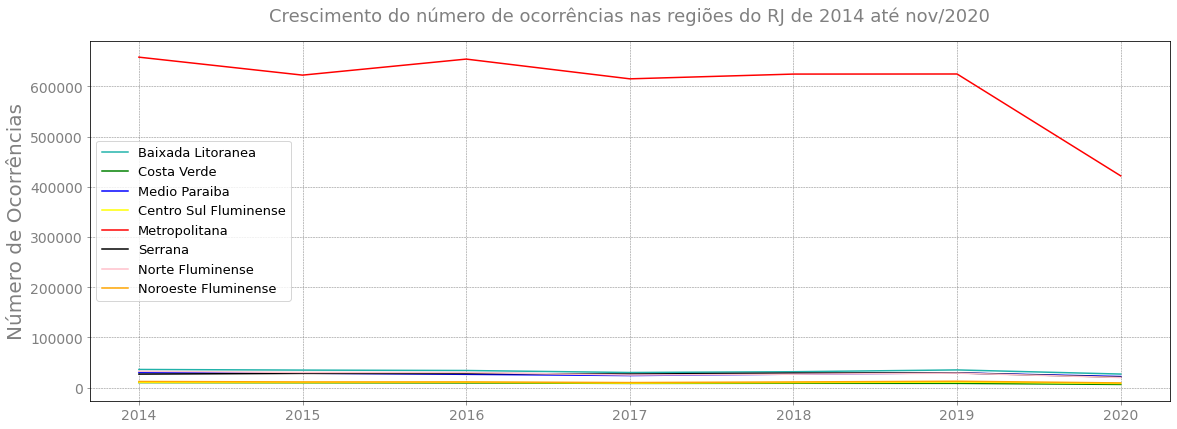

In [ ]:
# Crescimento do número de ocorrências nas regiões do RJ por ano de 2014 até nov/2020

fig = plt.figure(figsize=(15,5))
eixo = fig.add_axes([0,0,1,1])

eixo.grid(True, linestyle = '--', linewidth = 0.5)

eixo.plot(Crescimento_anual_regiao_baixada_litoraneas['ano'], Crescimento_anual_regiao_baixada_litoraneas['registro_ocorrencias'], color = 'lightseagreen')  #  Outros parametros: lw -> espessura da linha. ls -> stylo da linha. marker -> simbolo na linha.
eixo.plot(Crescimento_anual_regiao_costa_verde['ano'], Crescimento_anual_regiao_costa_verde['registro_ocorrencias'], color = 'green')
eixo.plot(Crescimento_anual_regiao_medio_paraiba['ano'], Crescimento_anual_regiao_medio_paraiba['registro_ocorrencias'], color = 'blue')
eixo.plot(Crescimento_anual_regiao_centro_sul_fluminense['ano'], Crescimento_anual_regiao_centro_sul_fluminense['registro_ocorrencias'], color = 'yellow')
eixo.plot(Crescimento_anual_regiao_metropolitana['ano'], Crescimento_anual_regiao_metropolitana['registro_ocorrencias'], color = 'red')
eixo.plot(Crescimento_anual_regiao_serrana['ano'], Crescimento_anual_regiao_serrana['registro_ocorrencias'], color = 'black')
eixo.plot(Crescimento_anual_regiao_norte_fluminense['ano'], Crescimento_anual_regiao_norte_fluminense['registro_ocorrencias'], color = 'pink')
eixo.plot(Crescimento_anual_regiao_noroeste_fluminense['ano'], Crescimento_anual_regiao_noroeste_fluminense['registro_ocorrencias'], color = 'orange')


eixo.set_title('Crescimento do número de ocorrências nas regiões do RJ de 2014 até nov/2020', fontsize = 18, pad = 20, color = 'grey')
eixo.legend(['Baixada Litoranea', 'Costa Verde', 'Medio Paraiba', 'Centro Sul Fluminense', 'Metropolitana', 'Serrana', 'Norte Fluminense', 'Noroeste Fluminense'], loc = 'best', fontsize = 13)
eixo.set_ylabel('Número de Ocorrências', fontsize = 20, color = 'grey')
eixo.set_xlabel('', fontsize = 0)

plt.tick_params(labelsize=14, colors='grey', grid_color='grey')

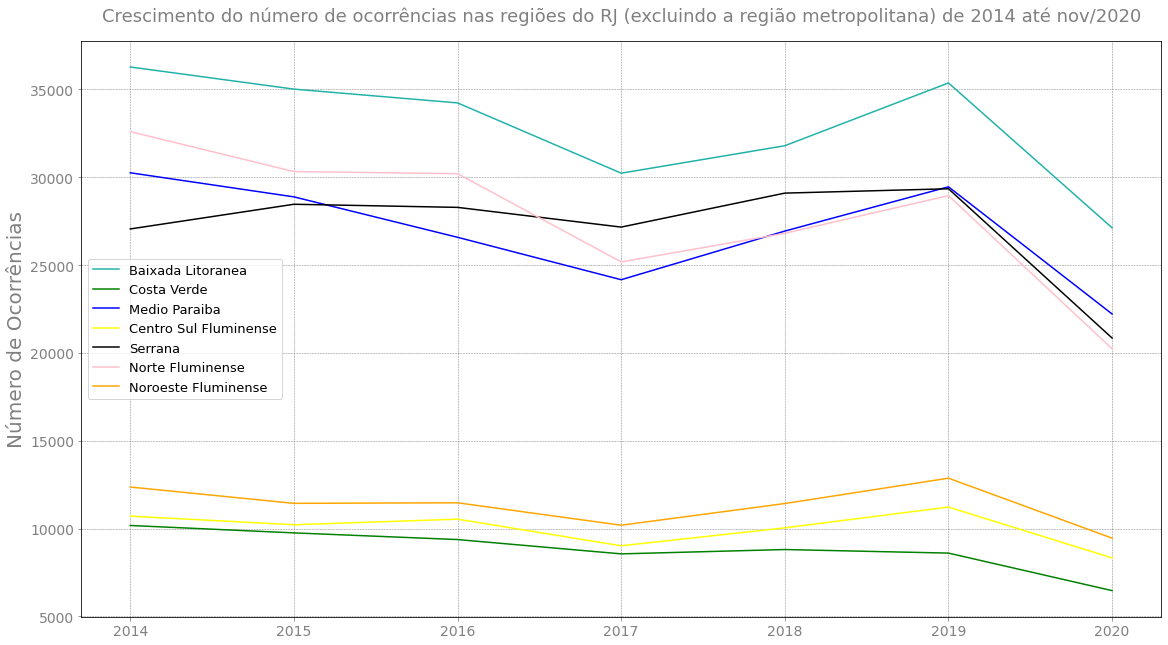

In [ ]:
# Crescimento do número de ocorrências nas regiões do RJ (excluindo região metropolitana) por ano de 2014 até nov/2020

fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])

eixo.grid(True, linestyle = '--', linewidth = 0.5)

eixo.plot(Crescimento_anual_regiao_baixada_litoraneas['ano'], Crescimento_anual_regiao_baixada_litoraneas['registro_ocorrencias'], color = 'lightseagreen')  #  Outros parametros: lw -> espessura da linha. ls -> stylo da linha. marker -> simbolo na linha.
eixo.plot(Crescimento_anual_regiao_costa_verde['ano'], Crescimento_anual_regiao_costa_verde['registro_ocorrencias'], color = 'green')
eixo.plot(Crescimento_anual_regiao_medio_paraiba['ano'], Crescimento_anual_regiao_medio_paraiba['registro_ocorrencias'], color = 'blue')
eixo.plot(Crescimento_anual_regiao_centro_sul_fluminense['ano'], Crescimento_anual_regiao_centro_sul_fluminense['registro_ocorrencias'], color = 'yellow')
eixo.plot(Crescimento_anual_regiao_serrana['ano'], Crescimento_anual_regiao_serrana['registro_ocorrencias'], color = 'black')
eixo.plot(Crescimento_anual_regiao_norte_fluminense['ano'], Crescimento_anual_regiao_norte_fluminense['registro_ocorrencias'], color = 'pink')
eixo.plot(Crescimento_anual_regiao_noroeste_fluminense['ano'], Crescimento_anual_regiao_noroeste_fluminense['registro_ocorrencias'], color = 'orange')


eixo.set_title('Crescimento do número de ocorrências nas regiões do RJ (excluindo a região metropolitana) de 2014 até nov/2020', fontsize = 18, pad = 20, color = 'grey')
eixo.legend(['Baixada Litoranea', 'Costa Verde', 'Medio Paraiba', 'Centro Sul Fluminense', 'Serrana', 'Norte Fluminense', 'Noroeste Fluminense'], loc = 'best', fontsize = 13)
eixo.set_ylabel('Número de Ocorrências', fontsize = 20, color = 'grey')
eixo.set_xlabel('', fontsize = 0)

plt.tick_params(labelsize=14, colors='grey', grid_color='grey')

<BarContainer object of 8 artists>

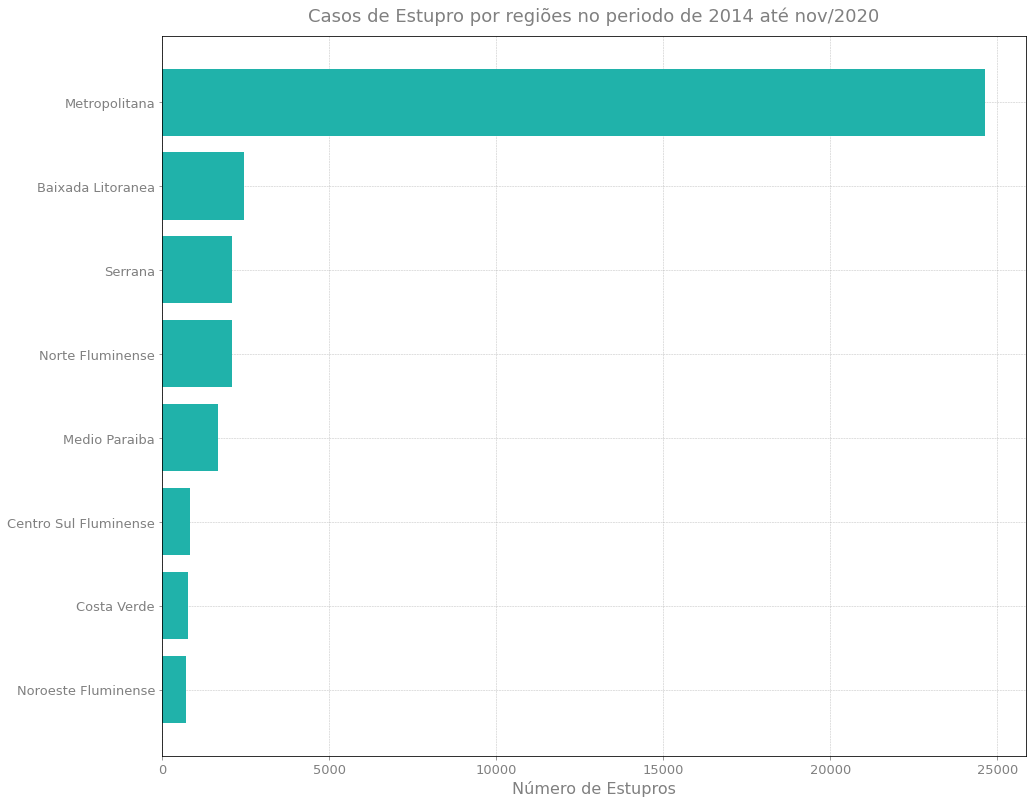

In [ ]:
# Casos de estupros nas regiões em geral

df_regioes = df_regioes.sort_values('Estupros')

fig = plt.figure(figsize=(12,10))
eixo = fig.add_axes([0,0,1,1])

eixo.grid(True, zorder = 0, linestyle = '--', linewidth = 0.5)
eixo.set_title('Casos de Estupro por regiões no periodo de 2014 até nov/2020', fontsize = 18, color = 'grey', pad = 15)
eixo.set_ylabel('', fontsize = 0)
eixo.set_xlabel('Número de Estupros', fontsize = 16, color = 'grey')
eixo.tick_params(labelsize=13, colors='grey', grid_color='grey', grid_alpha=0.5)

# Eixo bar
eixo.barh(df_regioes['Regioes'], df_regioes['Estupros'].sort_values(), color = 'lightseagreen', zorder = 2, )


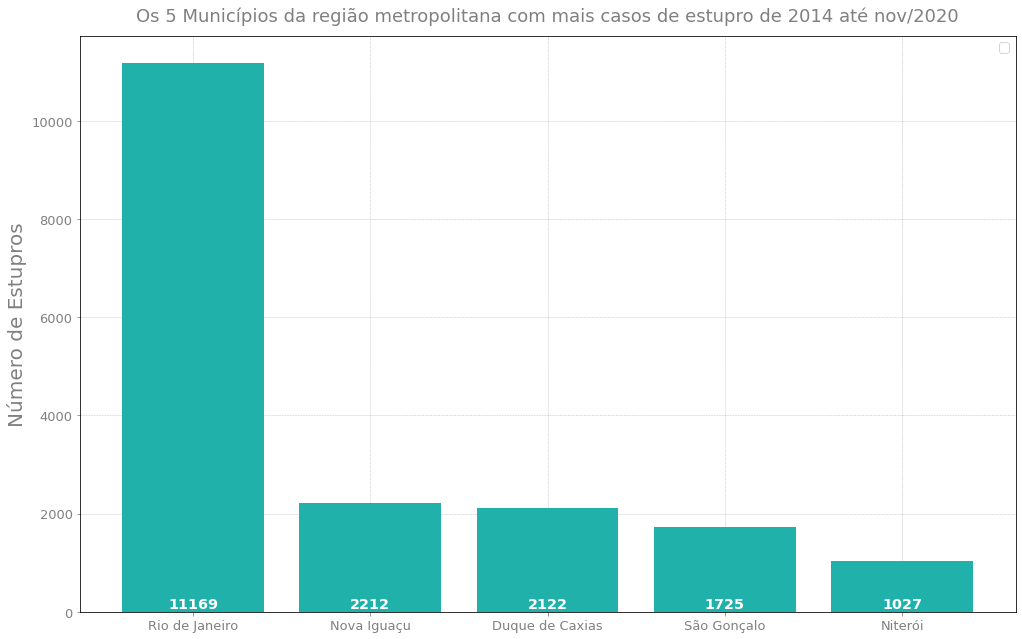

In [ ]:
# Visualizando quais as 5 cidades da região metropolitana com mais casos de estupro.

regiao_metropolita_estupro = regiao_metropolitana.groupby('fmun', as_index=False).sum()
regiao_metropolita_estupro = regiao_metropolita_estupro.query('estupro > 0')[['fmun', 'estupro']]
regiao_metropolita_estupro = regiao_metropolita_estupro.sort_values('estupro', ascending = False)
regiao_metropolita_estupro_cinco = regiao_metropolita_estupro.head(5).sort_values('estupro', ascending = False)


fig = plt.figure(figsize=(13,8))
eixo = fig.add_axes([0,0,1,1])
eixo.grid(True, zorder = 0, linestyle = '--', linewidth = 0.5)
eixo.set_title('Os 5 Municípios da região metropolitana com mais casos de estupro de 2014 até nov/2020', fontsize = 18, color = 'grey', pad = 15)
eixo.legend(['Número de Roubos'], loc = 'best', fontsize = 13)
eixo.set_ylabel('Número de Estupros', fontsize = 20, color = 'grey')
eixo.set_xlabel('', fontsize = 0)
eixo.tick_params(labelsize=13, colors='grey', grid_color='grey', grid_alpha=0.5)

# Eixo bar
eixo.bar(regiao_metropolita_estupro_cinco['fmun'], regiao_metropolita_estupro_cinco['estupro'], color = 'lightseagreen', zorder = 2)


# Labels inside bar
for rect in eixo.patches:
    height = rect.get_height()
    ypos = (rect.get_y() * height) + 10
    eixo.text(rect.get_x() + rect.get_width()/2., ypos,
            '%d' % int(height), ha='center', va='bottom', c="white", fontsize = 'x-large', weight = 'bold')

📌 Conclusões

    A região com maior número de roubos e furtos é a Metropolitana.
    A região com menor número de roubos e furtos é a região do centro Sul Fluminense.
    A cidade com maior numero de roubos é o Rio de janeiro e o menor numero de roubos é Varre-Sai.
    O número de roubos é muito maior na capital.

## Região Serrana
***

📎 NESTA SEÇÃO:

Esta seção consiste em analisar mais a fundo a Região Serrana do Rio de Janeiro.

<BarContainer object of 14 artists>

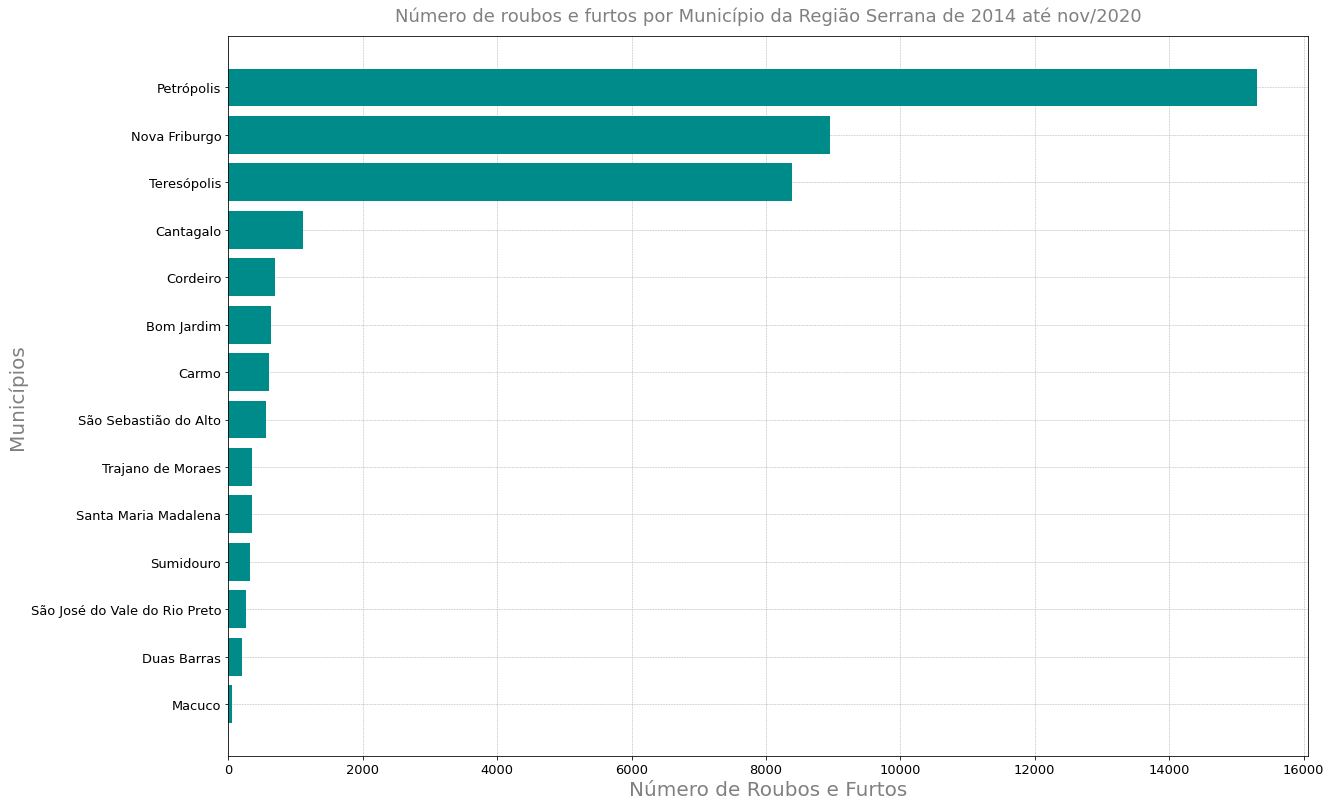

In [ ]:
# Numero de roubos e furtos nos Municipios da Região Serrana.

df_regiao_serrana = pd.DataFrame(regiao_serrana.groupby('fmun', as_index=False)[['total_roubos', 'total_furtos']].sum()).sort_values('total_roubos')
df_regiao_serrana['roubosEfurtos'] = df_regiao_serrana['total_furtos'] + df_regiao_serrana['total_roubos'] 
df_regiao_serrana

fig = plt.figure(figsize=(15,10))
eixo = fig.add_axes([0,0,1,1])

eixo.grid(True, zorder = 0, linestyle = '--', linewidth = 0.5)
eixo.set_title('Número de roubos e furtos por Município da Região Serrana de 2014 até nov/2020', fontsize = 18, color = 'grey', pad = 15)
eixo.set_ylabel('Municípios', fontsize = 20, color = 'grey')
eixo.set_xlabel('Número de Roubos e Furtos', fontsize = 20, color = 'grey')
eixo.tick_params(labelsize=13)

# Eixo bar
eixo.barh(df_regiao_serrana['fmun'], df_regiao_serrana['roubosEfurtos'].sort_values(), color = 'darkcyan', zorder = 2, )


In [ ]:
dados_Teresopolis = dados.query('fmun == "Teresópolis"')
df_dados_teresopolis = pd.DataFrame(dados_Teresopolis.groupby('ano', as_index = False)[['total_roubos', 'estupro', 'registro_ocorrencias']].sum())

dados_novafriburgo = dados.query('fmun == "Nova Friburgo"')
df_dados_novafriburgo = pd.DataFrame(dados_novafriburgo.groupby('ano', as_index = False)[['total_roubos', 'estupro', 'registro_ocorrencias']].sum())

dados_petropolis = dados.query('fmun == "Petrópolis"')
df_dados_petropolis = pd.DataFrame(dados_petropolis.groupby('ano', as_index = False)[['total_roubos', 'estupro', 'registro_ocorrencias', 'total_furtos']].sum())

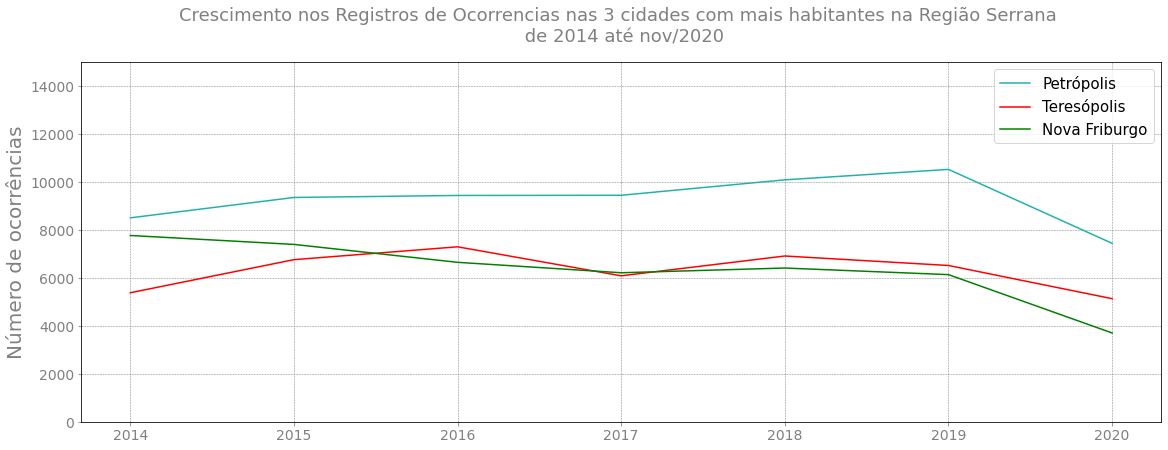

In [ ]:
# Comparação das três cidades com maior numero de habitantes em relação ao numero de ocorrencias

fig = plt.figure(figsize=(15,5))
eixo = fig.add_axes([0,0,1,1])

eixo.grid(True, linestyle = '--', linewidth = 0.5)
eixo.plot(df_dados_petropolis['ano'], df_dados_petropolis['registro_ocorrencias'], color = 'lightseagreen')  #  Outros parametros: lw -> espessura da linha. ls -> stylo da linha. marker -> simbolo na linha.

eixo.plot(df_dados_teresopolis['ano'], df_dados_teresopolis['registro_ocorrencias'], color = 'red') 
eixo.plot(df_dados_novafriburgo['ano'], df_dados_novafriburgo['registro_ocorrencias'], color = 'g') 
eixo.set_title('Crescimento nos Registros de Ocorrencias nas 3 cidades com mais habitantes na Região Serrana \n de 2014 até nov/2020', fontsize = 18, pad = 20, color = 'grey')
eixo.legend(['Petrópolis', 'Teresópolis', 'Nova Friburgo'], loc = 'best', fontsize = 15)
eixo.set_ylabel('Número de ocorrências', fontsize = 20, color = 'grey')
eixo.set_xlabel('', fontsize = 0)
eixo.set_ylim(0,15000)
plt.tick_params(labelsize=14, colors='grey', grid_color='grey')


(0.0, 600.0)

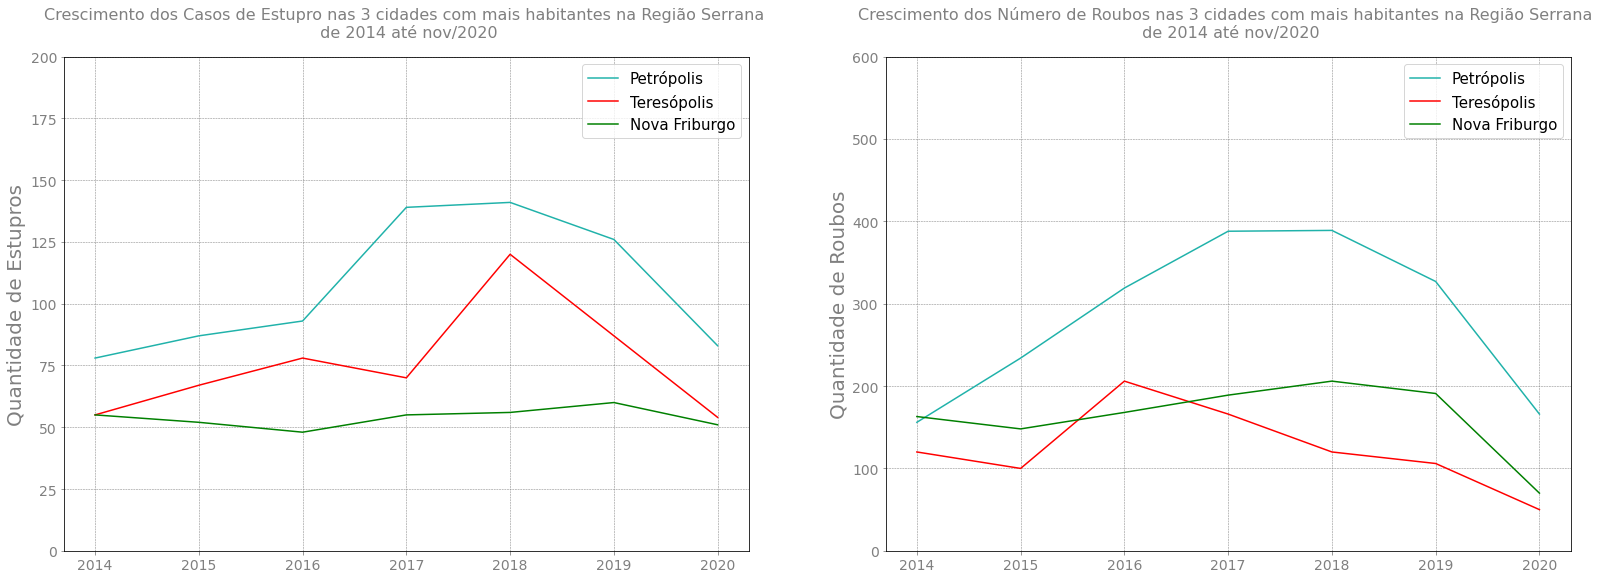

In [ ]:
# Comparação das três maiores cidades com maior numero de habitantes da região serrana em relação ao numero de estupros.

plt.figure(figsize=(27,20))
plt.subplot(2,2,1)

plt.grid(True, linestyle = '--', linewidth = 0.5)
plt.plot(df_dados_petropolis['ano'], df_dados_petropolis['estupro'], color = 'lightseagreen')  #  Outros parametros: lw -> espessura da linha. ls -> stylo da linha. marker -> simbolo na linha.

plt.plot(df_dados_teresopolis['ano'], df_dados_teresopolis['estupro'], color = 'red') 
plt.plot(df_dados_novafriburgo['ano'], df_dados_novafriburgo['estupro'], color = 'g') 
plt.title('Crescimento dos Casos de Estupro nas 3 cidades com mais habitantes na Região Serrana \n de 2014 até nov/2020', fontsize = 16, pad = 20, color = 'grey')
plt.legend(['Petrópolis', 'Teresópolis', 'Nova Friburgo'], loc = 'best', fontsize = 15)
plt.ylabel('Quantidade de Estupros', fontsize = 20, color = 'grey')
plt.xlabel('', fontsize = 0)
plt.ylim(0,200)
plt.tick_params(labelsize=14, colors='grey', grid_color='grey')

# Comparação das três maiores cidades com maior numero de habitantes em relação ao numero de roubos.

plt.subplot(2,2,2)

plt.grid(True, linestyle = '--', linewidth = 0.5)
plt.plot(df_dados_petropolis['ano'], df_dados_petropolis['total_roubos'], color = 'lightseagreen')  #  Outros parametros: lw -> espessura da linha. ls -> stylo da linha. marker -> simbolo na linha.

plt.plot(df_dados_teresopolis['ano'], df_dados_teresopolis['total_roubos'], color = 'red') 
plt.plot(df_dados_novafriburgo['ano'], df_dados_novafriburgo['total_roubos'], color = 'g') 
plt.title('Crescimento dos Número de Roubos nas 3 cidades com mais habitantes na Região Serrana \n de 2014 até nov/2020', fontsize = 16, pad = 20, color = 'grey')
plt.legend(['Petrópolis', 'Teresópolis', 'Nova Friburgo'], loc = 'best', fontsize = 15)
plt.ylabel('Quantidade de Roubos', fontsize = 20, color = 'grey')
plt.xlabel('', fontsize = 0)
plt.tick_params(labelsize=14, colors='grey', grid_color='grey')
plt.ylim(0,600)

📌 Conclusões:


* A cidade da região serrana com menor número de roubos e furtos é Macuco porém em relação a cidade de Petrópolis a qual possui o maior numero de roubos e furtos é errado fazer a comparação pois, de acordo com o IBGE no ano de 2020 Petrópolis tinha 306.678 habitantes e Macuco 5.623 habitantes.

* Comparando as 3 maiores cidades da região serrana onde Petrópolis tem em media 306.678 habitantes, Teresopolis: 184.240 habitantes e Nova Friburgo: 191.158 habitantes, foi possivel visualizar que Petrópolis é a cidade com maior número de roubos e furtos e casos de estupro.


fonte: https://www.ibge.gov.br/cidades-e-estados/rj/


## Cidade de Petrópolis
***

📎 NESTA SEÇÃO:

Esta seção consiste em analisar mais a fundo a cidade de Petrópolis a qual fica localizada na  Região Serrana do Rio de Janeiro.

### Numero de roubos e Furtos: Cidade de Petrópolis 
***

In [ ]:
df_dados_petropolis['roubosEfurtos'] = df_dados_petropolis['total_roubos'] + df_dados_petropolis['total_furtos'] 

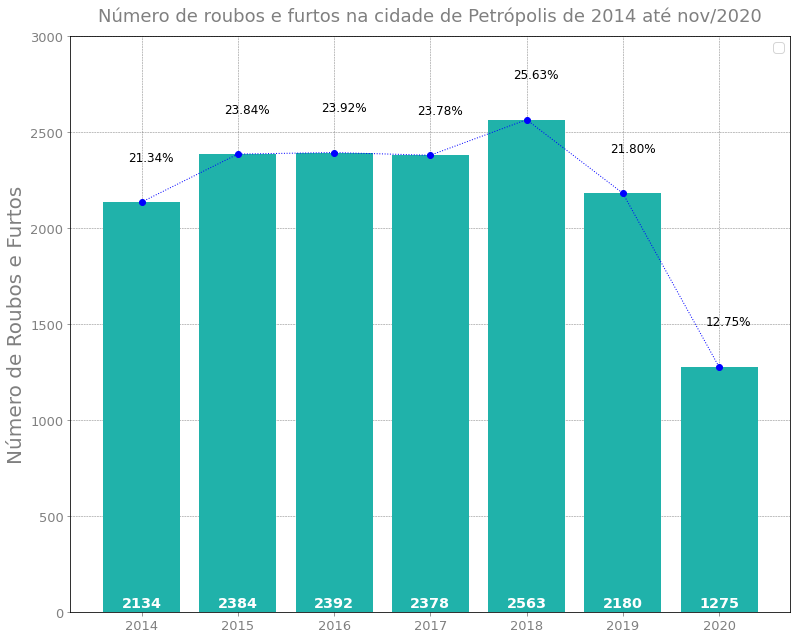

In [ ]:
# Crescimento Roubos e Furtos cidade petropolis por ano.

# Eixo 
fig = plt.figure(figsize=(10,8))
eixo = fig.add_axes([0,0,1,1])

eixo.grid(True, zorder = 0, linestyle = '--', linewidth = 0.5)
eixo.set_title('Número de roubos e furtos na cidade de Petrópolis de 2014 até nov/2020', fontsize = 18, color = 'grey', pad = 15)
eixo.legend(['Número de Roubos'], loc = 'best', fontsize = 13)
eixo.set_ylim(0,3000)
eixo.set_ylabel('Número de Roubos e Furtos', fontsize = 20, color = 'grey')
eixo.set_xlabel('', fontsize = 0)
eixo.tick_params(labelsize=13, colors='grey', grid_color='grey')

# Eixo bar
eixo.bar(df_dados_petropolis['ano'], df_dados_petropolis['roubosEfurtos'], color = 'lightseagreen', zorder = 2)

# Eixo line
eixo.plot(df_dados_petropolis['ano'], df_dados_petropolis['roubosEfurtos'], color='b', marker='o', linestyle=':', linewidth=1)

# Labels inside bar
for rect in eixo.patches:
    height = rect.get_height()
    ypos = (rect.get_y() * height) + 10
    eixo.text(rect.get_x() + rect.get_width()/2., ypos,
            '%d' % int(height), ha='center', va='bottom', c="white", fontsize = 'x-large', weight = 'bold')
    

sizes = []
for p in eixo.patches:
    height = p.get_height()
    sizes.append(height)
    eixo.text(p.get_x()+p.get_width()/1.6,
            height + 200,
            '{:1.2f}%'.format(height/100),
            ha="center", va='bottom',fontsize=12) 


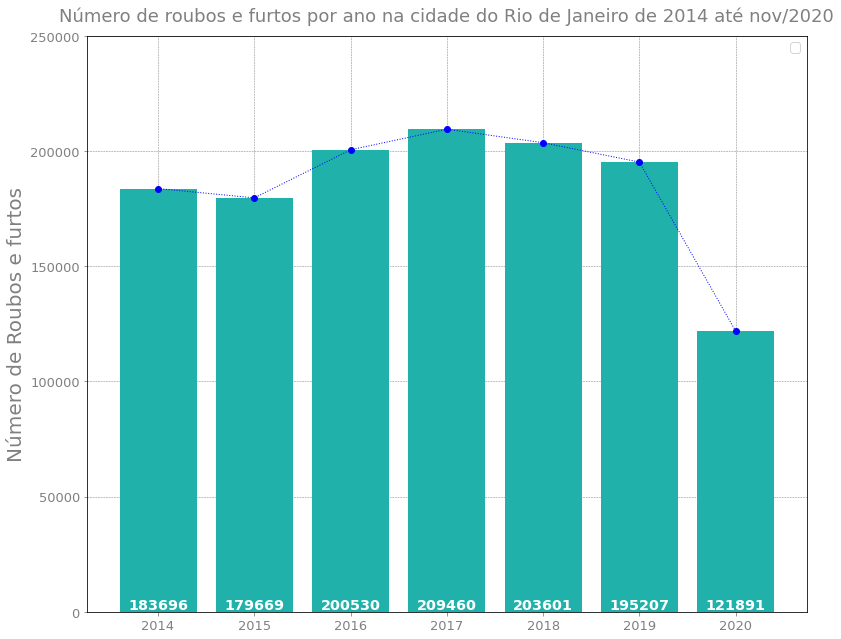

In [ ]:
# Crescimento roubos cidade Rio de janeiro por ano

dados_rj = dados.query('fmun == "Rio de Janeiro"')
df_dados_rj = pd.DataFrame(dados_rj.groupby('fmun', as_index = False)['total_roubos'].sum())
df_dados_rj = pd.DataFrame(dados_rj.groupby('ano', as_index = False)[['total_roubos', 'total_furtos']].sum())

df_dados_rj['roubosEfurtos'] = df_dados_rj['total_roubos'] + df_dados_rj['total_furtos'] 

# Eixo 
fig = plt.figure(figsize=(10,8))
eixo = fig.add_axes([0,0,1,1])

eixo.grid(True, zorder = 0, linestyle = '--', linewidth = 0.5)
eixo.set_title('Número de roubos e furtos por ano na cidade do Rio de Janeiro de 2014 até nov/2020', fontsize = 18, color = 'grey', pad = 15)
eixo.legend(['Número de Roubos e furtos'], loc = 'best', fontsize = 13)
eixo.set_ylim(0,250000)
eixo.set_ylabel('Número de Roubos e furtos', fontsize = 20, color = 'grey')
eixo.set_xlabel('', fontsize = 0)
eixo.tick_params(labelsize=13, colors='grey', grid_color='grey')

# Eixo bar
eixo.bar(df_dados_rj['ano'], df_dados_rj['roubosEfurtos'], color = 'lightseagreen', zorder = 2)

# Eixo line
eixo.plot(df_dados_rj['ano'], df_dados_rj['roubosEfurtos'], color='b', marker='o', linestyle=':', linewidth=1)

# Labels inside bar
for rect in eixo.patches:
    height = rect.get_height()
    ypos = (rect.get_y() * height) + 10
    eixo.text(rect.get_x() + rect.get_width()/2., ypos,
            '%d' % int(height), ha='center', va='bottom', c="white", fontsize = 'x-large', weight = 'bold')

### Drogas: Cidade de Petrópolis
***

In [ ]:
dados_inteiror = regiao_serrana

dados_inteiror_drogas = pd.DataFrame(dados_inteiror.groupby(['ano','fmun'], as_index = False)[['trafico_drogas', 'posse_drogas', 'apreensao_drogas']].sum())
dados_petropolis_drogas = dados_inteiror_drogas.query('fmun == "Petrópolis"')

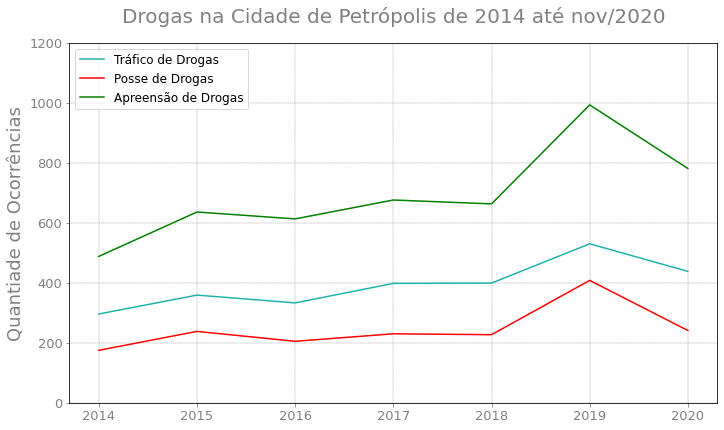

In [ ]:
# Drogas na Cidade de Petrópolis de 2014 até set/2020

fig = plt.figure(figsize=(9,5))
eixo = fig.add_axes([0,0,1,1])

eixo.grid(True, linestyle = '--', linewidth = 0.4)
eixo.plot(dados_petropolis_drogas['ano'], dados_petropolis_drogas['trafico_drogas'], color = 'lightseagreen')  #  Outros parametros: lw -> espessura da linha. ls -> stylo da linha. marker -> simbolo na linha.

eixo.plot(dados_petropolis_drogas['ano'], dados_petropolis_drogas['posse_drogas'], color = 'red') 
eixo.plot(dados_petropolis_drogas['ano'], dados_petropolis_drogas['apreensao_drogas'], color = 'g') 
eixo.set_title('Drogas na Cidade de Petrópolis de 2014 até nov/2020', fontsize = 20, pad = 20, color = 'grey')
eixo.legend(['Tráfico de Drogas', 'Posse de Drogas', 'Apreensão de Drogas'], loc = 'best', fontsize = 12)
eixo.set_ylabel('Quantiade de Ocorrências', fontsize = 18, color = 'grey')
plt.xlabel('', fontsize = 0)
eixo.set_ylim(0,1200)
eixo.tick_params(labelsize=13, colors='grey', grid_color='grey')

📌 Conclusões:

* De acordo com Diario de Petrópolis a Apreensão de drogas cresce 44% na cidade em 2019 o que explica o comportamento do gráfico. 

* fonte: https://www.diariodepetropolis.com.br/integra/apreensao-de-drogas-cresce-44-na-cidade-em-2019-172991

### Crimes em geral: Cidade de Petrópolis
***

In [ ]:
df_dados_petropolis_crimes_violentos = pd.DataFrame(dados_petropolis.groupby('ano', as_index = False)[['hom_doloso', 'lesao_corp_morte', 'latrocinio', 'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom', 'lesao_corp_dolosa', 'estupro' ]].sum())

(0.0, 200.0)

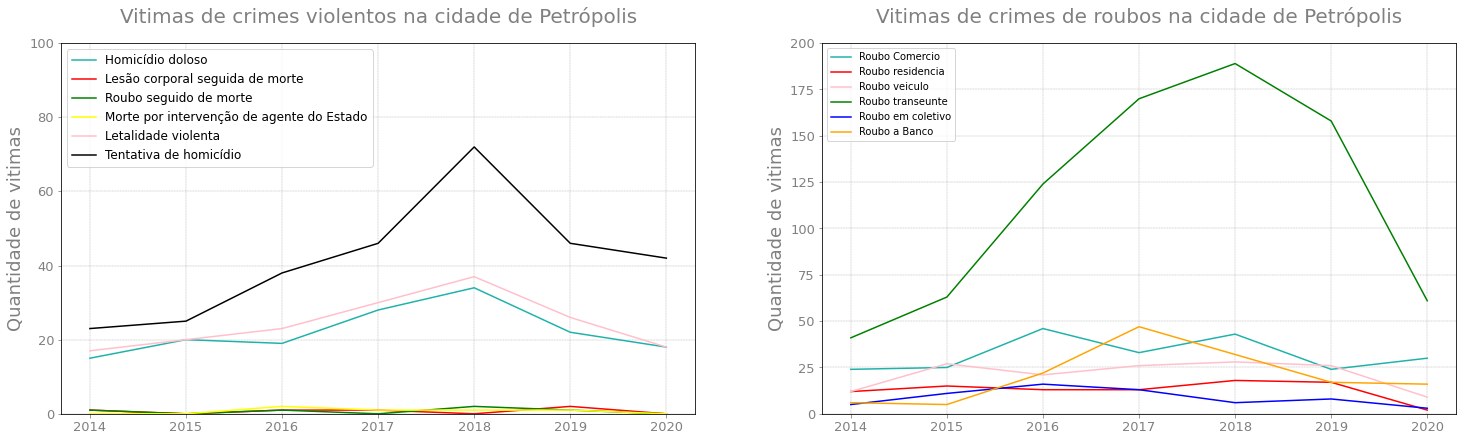

In [ ]:
plt.figure(figsize=(25,15))

ax1 = plt.subplot(2,2,1)

plt.grid(True, linestyle = '--', linewidth = 0.3)
plt.plot(df_dados_petropolis_crimes_violentos['ano'], df_dados_petropolis_crimes_violentos['hom_doloso'], color = 'lightseagreen')  #  Outros parametros: lw -> espessura da linha. ls -> stylo da linha. marker -> simbolo na linha.
plt.plot(df_dados_petropolis_crimes_violentos['ano'], df_dados_petropolis_crimes_violentos['lesao_corp_morte'], color = 'red') 
plt.plot(df_dados_petropolis_crimes_violentos['ano'], df_dados_petropolis_crimes_violentos['latrocinio'], color = 'g') 
plt.plot(df_dados_petropolis_crimes_violentos['ano'], df_dados_petropolis_crimes_violentos['hom_por_interv_policial'], color = 'yellow') 
plt.plot(df_dados_petropolis_crimes_violentos['ano'], df_dados_petropolis_crimes_violentos['letalidade_violenta'], color = 'pink') 
plt.plot(df_dados_petropolis_crimes_violentos['ano'], df_dados_petropolis_crimes_violentos['tentat_hom'], color = 'black') 


plt.title('Vitimas de crimes violentos na cidade de Petrópolis', fontsize = 20, pad = 20, color = 'grey')
plt.legend(['Homicídio doloso', 'Lesão corporal seguida de morte', 'Roubo seguido de morte', 'Morte por intervenção de agente do Estado', 'Letalidade violenta', 'Tentativa de homicídio'], loc = 'best', fontsize = 12)
plt.ylabel('Quantidade de vitimas', fontsize = 18, color = 'grey')
plt.xlabel('', fontsize = 0)
plt.tick_params(labelsize=13, colors='grey', grid_color='grey')
plt.ylim(0,100)


# Vitimas de crimes de roubos  cidade de Petrópolis

ax1 = plt.subplot(2,2,2)

df_dados_petropolis_crimes_roubos = pd.DataFrame(dados_petropolis.groupby('ano', as_index = False)[['roubo_comercio',
                                                                                                    'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
                                                                                                    'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico', 'roubo_celular',
                                                                                                    'roubo_conducao_saque', 'roubo_apos_saque', 'roubo_bicicleta']].sum())

plt.grid(True, linestyle = '--', linewidth = 0.3)
plt.plot(df_dados_petropolis_crimes_roubos['ano'], df_dados_petropolis_crimes_roubos['roubo_comercio'], color = 'lightseagreen')  
plt.plot(df_dados_petropolis_crimes_roubos['ano'], df_dados_petropolis_crimes_roubos['roubo_residencia'], color = 'red') 
plt.plot(df_dados_petropolis_crimes_roubos['ano'], df_dados_petropolis_crimes_roubos['roubo_veiculo'], color = 'pink')  
plt.plot(df_dados_petropolis_crimes_roubos['ano'], df_dados_petropolis_crimes_roubos['roubo_transeunte'], color = 'green')  
plt.plot(df_dados_petropolis_crimes_roubos['ano'], df_dados_petropolis_crimes_roubos['roubo_em_coletivo'], color = 'blue')  
plt.plot(df_dados_petropolis_crimes_roubos['ano'], df_dados_petropolis_crimes_roubos['roubo_celular'], color = 'orange') 


plt.title('Vitimas de crimes de roubos na cidade de Petrópolis', fontsize = 20, pad = 20, color = 'grey')
plt.legend(['Roubo Comercio', 'Roubo residencia', 'Roubo veiculo', 'Roubo transeunte', 'Roubo em coletivo', 'Roubo a Banco',
            'Roubo de celular'], loc = 'best', fontsize = 10)
plt.ylabel('Quantidade de vitimas', fontsize = 18, color = 'grey')
plt.xlabel('', fontsize = 0)
plt.tick_params(labelsize=13, colors='grey', grid_color='grey')
plt.ylim(0,200)

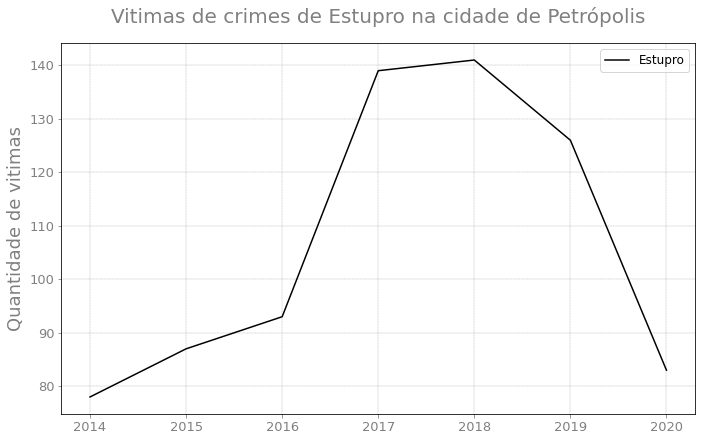

In [ ]:
plt.figure(figsize=(25,15))

ax1 = plt.subplot(2,2,1)

plt.grid(True, linestyle = '--', linewidth = 0.3)
plt.plot(df_dados_petropolis_crimes_violentos['ano'], df_dados_petropolis_crimes_violentos['estupro'], color = 'black') 


plt.title('Vitimas de crimes de Estupro na cidade de Petrópolis', fontsize = 20, pad = 20, color = 'grey')
plt.legend(['Estupro'], loc = 'best', fontsize = 12)
plt.ylabel('Quantidade de vitimas', fontsize = 18, color = 'grey')
plt.xlabel('', fontsize = 0)
plt.tick_params(labelsize=13, colors='grey', grid_color='grey')


In [ ]:
# Porcentagem dos crimes violentos 

df_dados_petropolis_crimes_violentos.iloc[:,0]
df_crimes_porcentagem = pd.DataFrame()

df_crimes_porcentagem = df_dados_petropolis_crimes_violentos.iloc[:,[1,5,6,7,8]].apply(lambda c: c / c.sum() * 100).diff().round(1)
df_crimes_porcentagem['ano'] = df_dados_petropolis_crimes_violentos.iloc[:,0]
df_crimes_porcentagem = df_crimes_porcentagem.set_index('ano')
df_crimes_porcentagem.dropna(inplace = True)
df_crimes_porcentagem


,hom_doloso,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro
ano,,,,,
2015,3.2,1.8,0.7,-1.3,1.2
2016,-0.6,1.8,4.5,0.3,0.8
2017,5.8,4.1,2.7,0.6,6.2
2018,3.8,4.1,8.9,-0.5,0.3
2019,-7.7,-6.4,-8.9,1.7,-2.0
2020,-2.6,-4.7,-1.4,-4.9,-5.8


📌 Conclusões

* Em 2016 para 2017 teve um aumento de cerca 6% nos homicidios dolosos e de 2017 para 2018 teve um aumento de cerca de 4% na cidade de Petrópolis

* Fonte: https://tribunadepetropolis.com.br/petropolis-tem-a-maior-taxa-de-homicidios-da-decada#:~:text=Os%20casos%20de%20estupro%20aumentaram,%2C%20e%20388%20em%202017).

# Machine learning: Cluster (K-Means)

📎 NESTA SEÇÃO:

Esta seção consiste em encontrar padrões entre as cidades utilizando clusterização.


***

</br>

O algoritmo K-Means procura encontrar o número K de clusters em um conjunto de dados. Esses aglomerados devem estar separados, pois podem ser uns dos outros e manter seus elementos o mais próximos possível.

***
**O problema**

A análise de cluster é ideal para encontrar padrões, segmentação de clientes e, no nosso caso, encontrar qualquer semelhança. No entanto, a questão é sempre a mesma: quais são os números K que tornam o número de clusters ótimo?

***

**O metodo utilizado para encontrar o número ideal de clusters foi:**


* <u>O método do cotovelo</u> : esta abordagem plota os valores do WCSS ( Within Clusters Summed Squares ) e o ponto onde o valor do parâmetro cai mais do valor anterior é selecionado.


***


In [ ]:
dados.head()

,fmun_cod,fmun,ano,mes,mes_ano,regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,cvli,roubo_rua,registro_ocorrencias,fase
0,3300100,Angra dos Reis,2014,1,2014m01,Interior,11,0,0,1,12,2,96,7,4,37,4,0,8,0,5,1,0,0,1,0,0,0,5,23,18,3,3,11,0,98,134,0,0,0,21,35,18,12,5,9,28,6,8,0,98,13,3,0,0,0,11,7,561,3
1,3300159,Aperibé,2014,1,2014m01,Interior,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,3300209,Araruama,2014,1,2014m01,Interior,2,0,0,0,2,6,69,7,1,45,3,2,9,0,6,0,0,0,1,0,0,0,2,23,16,2,1,10,0,76,105,0,2,0,18,13,9,4,1,4,34,5,5,0,91,10,1,0,0,0,2,7,480,3
3,3300225,Areal,2014,1,2014m01,Interior,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,3300233,Armação dos Búzios,2014,1,2014m01,Interior,2,0,0,0,2,0,44,6,0,26,0,0,2,0,5,0,0,0,1,0,0,0,20,12,9,9,2,7,0,74,117,0,0,0,4,16,6,10,2,2,26,8,3,2,46,0,0,0,0,0,2,6,309,3


In [ ]:
df_crimes = dados[['fmun_cod', 'fmun', 'estupro', 'hom_doloso', 'sequestro', 'roubo_transeunte']]

In [ ]:
df_crimes = df_crimes.groupby(['fmun_cod','fmun'], as_index=False)['estupro', 'hom_doloso', 'sequestro', 'roubo_transeunte'].sum()
df_crimes.head()

,fmun_cod,fmun,estupro,hom_doloso,sequestro,roubo_transeunte
0,3300100,Angra dos Reis,476,620,0,1178
1,3300159,Aperibé,10,3,0,4
2,3300209,Araruama,320,385,0,1358
3,3300225,Areal,11,2,0,1
4,3300233,Armação dos Búzios,121,104,0,493


In [ ]:
df_crimes_soma_q = df_crimes[['estupro', 'hom_doloso', 'sequestro', 'roubo_transeunte']]

In [ ]:
df_ocorrencias = dados[['fmun_cod', 'fmun', 'registro_ocorrencias']]

In [ ]:
df_ocorrencias.head()

,fmun_cod,fmun,registro_ocorrencias
0,3300100,Angra dos Reis,561
1,3300159,Aperibé,0
2,3300209,Araruama,480
3,3300225,Areal,0
4,3300233,Armação dos Búzios,309


In [ ]:
df_ocorrencias = df_ocorrencias.groupby(['fmun_cod','fmun'], as_index=False)['registro_ocorrencias'].sum()

In [ ]:
df_ocorrencias.head()

,fmun_cod,fmun,registro_ocorrencias
0,3300100,Angra dos Reis,34302
1,3300159,Aperibé,1032
2,3300209,Araruama,35423
3,3300225,Areal,674
4,3300233,Armação dos Búzios,17305


In [ ]:
# inercia

def calcular_wcss(data): 
    wcss = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X=data)
        data["clusters"] = kmeans.labels_
        wcss.append(kmeans.inertia_)
    return wcss

In [ ]:
df_ocorr = df_ocorrencias[['registro_ocorrencias']]
df_ocorr.head()

,registro_ocorrencias
0,34302
1,1032
2,35423
3,674
4,17305


In [ ]:
soma_quadrados = calcular_wcss(df_crimes_soma_q) # inercia
soma_quadrados

[80501656273.7935,
 6558862854.923077,
 1236066049.7348838,
 523534238.4562249,
 304427641.6730769,
 149485064.12121212,
 72492951.77777778,
 42624382.61111111,
 29278982.94444444]

<h2> Regra do Cotovelo </h2>

***

O **método Elbow** é a maneira mais popular de encontrar o número ideal de clusters no conjunto de dados selecionado. Este método emprega o parâmetro Within Cluster Summed Squares ou parâmetro WCSS , este número é obtido com as localizações dos centróides de cada grupo .

***

Esse método é chamado de **Método do cotovelo** porque o ponto onde a diminuição do parâmetro WCSS começa a ficar menos significativa faz com que o gráfico pareça um braço semiflexionado, e o ponto que nos dá o número ideal de clusters é o cotovelo.

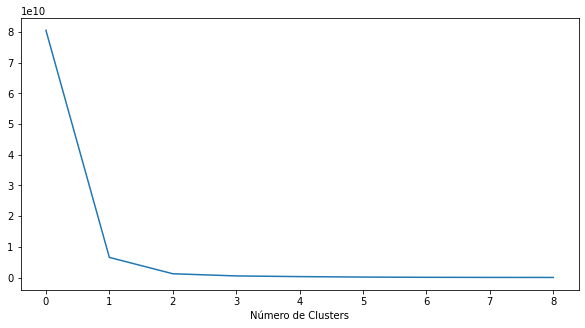

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(soma_quadrados)
plt.xlabel("Número de Clusters")
plt.show()

<h2> Regra Matemática <h2>

***

In [ ]:
import math
def numero_otimo_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distancias = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerador = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominador = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distancias.append(numerador/denominador)
    
    return distancias.index(max(distancias)) + 2

In [ ]:
# calculando a soma dos quadrados para as quantidade de clusters
soma_quadrados = calcular_wcss(df_crimes_soma_q)

# calculando a quantidade ótima de clusters
n = numero_otimo_clusters(soma_quadrados)

In [ ]:
n

4

In [ ]:
# rodando o kmeans para nossa quantidade ótima de clusters
kmeans = KMeans(n_clusters=4)
df_crimes['cluster'] = kmeans.fit_predict(df_crimes_soma_q)
df_crimes.head()

,fmun_cod,fmun,estupro,hom_doloso,sequestro,roubo_transeunte,cluster
0,3300100,Angra dos Reis,476,620,0,1178,0
1,3300159,Aperibé,10,3,0,4,0
2,3300209,Araruama,320,385,0,1358,0
3,3300225,Areal,11,2,0,1,0
4,3300233,Armação dos Búzios,121,104,0,493,0


In [ ]:
df_crimes.groupby('cluster')['estupro',	'hom_doloso',	'sequestro',	'roubo_transeunte'].sum().reset_index()

,cluster,estupro,hom_doloso,sequestro,roubo_transeunte
0,0,14411,12217,8,53920
1,1,11169,8619,15,275918
2,2,3663,3699,1,76396
3,3,6059,7206,9,128975


In [ ]:
#função para ordenar o número de clusters 

def ordenar_cluster(cluster_nome, target_nome,df,ascending):
    novo_nome = 'novo' + cluster_nome
    agrupado_por_cluster = df.groupby(cluster_nome)[target_nome].mean().reset_index()
    agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by=target_nome,
                                                                     ascending=ascending).reset_index(drop=True)
    agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index
    juntando_cluster = pd.merge(df,agrupado_por_cluster_ordenado[[cluster_nome,'index']], on=cluster_nome)
    removendo_dados = juntando_cluster.drop([cluster_nome],axis=1)
    df_final = removendo_dados.rename(columns={"index":cluster_nome})
    return df_final

df_ocorrencias = ordenar_cluster('cluster','registro_ocorrencias', df_ocorrencias,True)


In [ ]:
df_crimes.head()

In [ ]:
sns.countplot(df_crimes['cluster'])

In [ ]:
df_crimes.query('cluster == 1')

In [ ]:
df_final_ocorrencias = df_ocorrencias

In [ ]:
df_final_ocorrencias.loc[df_ocorrencias['numero_ocorrencias_cluster']==2,'Segmento'] = 'Alto numero de ocorrencias' 
df_final_ocorrencias.loc[df_ocorrencias['numero_ocorrencias_cluster']==1,'Segmento'] = 'Media numero de ocorrencias' 
df_final_ocorrencias.loc[df_ocorrencias['numero_ocorrencias_cluster']==0,'Segmento'] = 'Baixo numero de ocorrencias' 

In [ ]:
df_final_ocorrencias.head()

In [ ]:
df_ocorrencias = df_final_ocorrencias[['fmun_cod','numero_ocorrencias_cluster']]

# Visualização usando GeoPandas
***
📎 NESTA SEÇÃO:

Esta seção consiste em utilizar a biblioteca GeoPandas para plotar o mapa com os clusters encontrados na seção passada.


Fonte dos dados: ftp://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2017/UFs/)

***

In [ ]:
!pip install geopandas==0.3.0
!pip install pandas==1.0.1

In [ ]:
rj = gpd.read_file('/content/33MUE250GC_SIR.shp')

In [ ]:
rj.head()

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,(POLYGON ((-44.33207951767609 -23.023835479182...
1,1469,3300159,APERIBÉ,POLYGON ((-42.08950238077959 -21.6289329293311...
2,1470,3300209,ARARUAMA,POLYGON ((-42.22525542277279 -22.5925335128971...
3,1471,3300225,AREAL,POLYGON ((-43.16007457995859 -22.2000478703121...
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,(POLYGON ((-41.9842653529651 -22.7445758290788...


In [ ]:
rj = rj.rename(columns = {
    'CD_GEOCODM': 'fmun_cod'
})

In [ ]:
dfrj = pd.DataFrame(rj)

In [ ]:
dfrj.head()

,ID,fmun_cod,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,(POLYGON ((-44.33207951767609 -23.023835479182...
1,1469,3300159,APERIBÉ,POLYGON ((-42.08950238077959 -21.6289329293311...
2,1470,3300209,ARARUAMA,POLYGON ((-42.22525542277279 -22.5925335128971...
3,1471,3300225,AREAL,POLYGON ((-43.16007457995859 -22.2000478703121...
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,(POLYGON ((-41.9842653529651 -22.7445758290788...


In [ ]:
dfrj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          92 non-null     int64 
 1   fmun_cod    92 non-null     object
 2   NM_MUNICIP  92 non-null     object
 3   geometry    92 non-null     object
dtypes: int64(1), object(3)
memory usage: 3.0+ KB


In [ ]:
df_crimes['fmun_cod'] = df_crimes['fmun_cod'].astype(int)
df_crimes['cluster'] = df_crimes['cluster'].astype(int)

In [ ]:
df_crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   fmun_cod          92 non-null     int64 
 1   fmun              92 non-null     object
 2   estupro           92 non-null     int64 
 3   hom_doloso        92 non-null     int64 
 4   sequestro         92 non-null     int64 
 5   roubo_transeunte  92 non-null     int64 
 6   cluster           92 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.8+ KB


In [ ]:
dfrj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          92 non-null     int64 
 1   fmun_cod    92 non-null     object
 2   NM_MUNICIP  92 non-null     object
 3   geometry    92 non-null     object
dtypes: int64(1), object(3)
memory usage: 3.0+ KB


In [ ]:
dfrj['fmun_cod'] = dfrj['fmun_cod'].astype(int)

In [ ]:
df_rj = dfrj

In [ ]:
df_rj_final = dfrj.merge(df_crimes, on = "fmun_cod", how = "left")

In [ ]:
df_rj_final

,ID,fmun_cod,NM_MUNICIP,geometry,fmun,estupro,hom_doloso,sequestro,roubo_transeunte,cluster
0,1468,3300100,ANGRA DOS REIS,(POLYGON ((-44.33207951767609 -23.023835479182...,Angra dos Reis,476,620,0,1178,0
1,1469,3300159,APERIBÉ,POLYGON ((-42.08950238077959 -21.6289329293311...,Aperibé,10,3,0,4,0
2,1470,3300209,ARARUAMA,POLYGON ((-42.22525542277279 -22.5925335128971...,Araruama,320,385,0,1358,0
3,1471,3300225,AREAL,POLYGON ((-43.16007457995859 -22.2000478703121...,Areal,11,2,0,1,0
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,(POLYGON ((-41.9842653529651 -22.7445758290788...,Armação dos Búzios,121,104,0,493,0
...,...,...,...,...,...,...,...,...,...,...
87,1555,3306008,TRÊS RIOS,POLYGON ((-43.13666285081599 -22.1093322777438...,Três Rios,268,127,0,138,0
88,1556,3306107,VALENÇA,"POLYGON ((-43.8211961898697 -22.0884382608213,...",Valença,162,41,0,50,0
89,1557,3306156,VARRE-SAI,POLYGON ((-41.82695268563789 -20.8416403276417...,Varre-Sai,20,0,0,0,0
90,1558,3306206,VASSOURAS,"POLYGON ((-43.6120825547585 -22.3084056458216,...",Vassouras,104,45,0,40,0


In [ ]:
df_rj_final = gpd.GeoDataFrame(df_rj_final)

In [ ]:
df_rj_final = df_rj_final.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [ ]:
df_rj_zero = df_rj_final.query('cluster == 0')
df_rj_um = df_rj_final.query('cluster == 1')
df_rj_dois = df_rj_final.query('cluster == 2')
df_rj_tres = df_rj_final.query('cluster == 3')

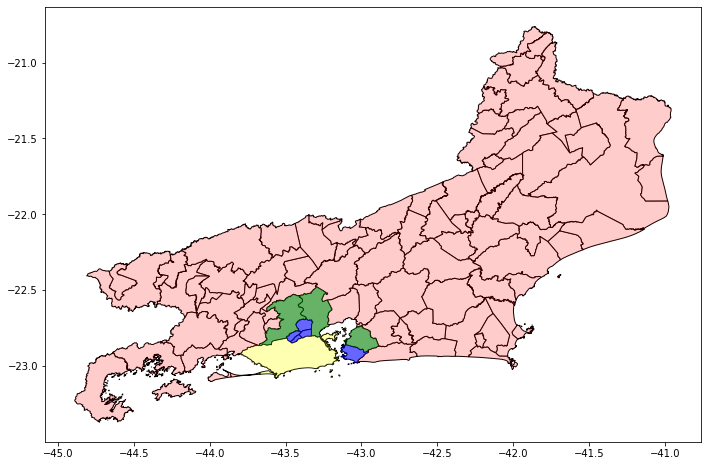

In [ ]:
base = rj.plot(color = 'white', edgecolor='black', figsize=(15,8))
df_rj_zero.plot(ax = base, markersize = 50, color = 'red', alpha = 0.2)
df_rj_um.plot(ax = base, markersize = 50, color = 'yellow', alpha = 0.3)
df_rj_dois.plot(ax = base, markersize = 50, color = 'blue', alpha = 0.6)
df_rj_tres.plot(ax = base, markersize = 50, color = 'green', alpha = 0.6)
